<a href="https://colab.research.google.com/github/ninivehelen/Analise_De_Dados/blob/master/Exercicio_grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gráfico da classificação dos filmes**

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df_movies = pd.read_csv("/content/movies.csv")

In [97]:
df_notas = pd.read_csv("/content/ratings.csv")

**Calculando a média**

In [98]:
df_notas = df_notas.groupby('movieId').mean()['rating']

**Juntando dataframe filmes e os das notas**

In [99]:
df_movies_notas = pd.merge(df_movies, df_notas, how = 'inner', on = 'movieId')

**Unindo dataframe pelo Id**

In [100]:
df_movies_notas = df_movies_notas.groupby(by="movieId").first()

In [101]:
df_movies_notas

,title,genres,rating
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
193585,Flint (2017),Drama,3.500000


**Selecionando os 3 filmes categorizado como Bom e Ruim**

In [102]:
melhor_filme = (df_movies_notas.loc[df_movies_notas['title'].isin(['Harry Potter and the Prisoner of Azkaban (2004)','Dark Knight, The (2008)','Avengers: Infinity War - Part I (2018)'])])

In [103]:
pior_filme = (df_movies_notas.loc[df_movies_notas['title'].isin(['Batman v Superman: Dawn of Justice (2016)','Green Lantern (2011)','Suicide Squad (2016)'])])

**Categorizando os filmes para gerar o gráfico**

In [104]:
melhor_filme['classificacao'] = 'Bom'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
melhor_filme

,title,genres,rating,classificacao
movieId,,,,
8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,3.913978,Bom
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.238255,Bom
122912,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi,4.000000,Bom


In [106]:
pior_filme['classificacao'] = 'Ruim'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
pior_filme

,title,genres,rating,classificacao
movieId,,,,
87430,Green Lantern (2011),Action|Adventure|Sci-Fi,2.350000,Ruim
135536,Suicide Squad (2016),Action|Crime|Sci-Fi,2.916667,Ruim
136864,Batman v Superman: Dawn of Justice (2016),Action|Adventure|Fantasy|Sci-Fi,2.343750,Ruim


**Juntando o dataframe com os filmes selecionados  categorizados**

In [108]:
filmes_notas = pd.concat([pior_filme, melhor_filme])

In [109]:
filmes_notas

,title,genres,rating,classificacao
movieId,,,,
87430,Green Lantern (2011),Action|Adventure|Sci-Fi,2.350000,Ruim
135536,Suicide Squad (2016),Action|Crime|Sci-Fi,2.916667,Ruim
136864,Batman v Superman: Dawn of Justice (2016),Action|Adventure|Fantasy|Sci-Fi,2.343750,Ruim
8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX,3.913978,Bom
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.238255,Bom
122912,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi,4.000000,Bom


**Gerando o gráfico**

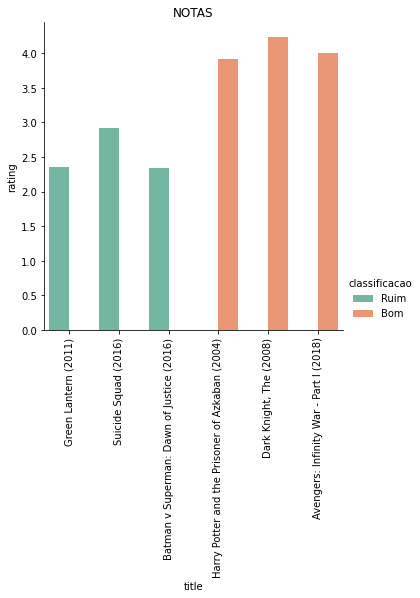

In [127]:
fig = sns.catplot(data=filmes_notas, kind='bar', x='title', y='rating', hue='classificacao',palette="Set2")
fig.set(title = "NOTAS")
fig.set_xticklabels(filmes_notas['title'], rotation=90);
